In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [39]:
data=pd.read_csv("laser_sencilla.csv")

In [40]:
data.tail()

,Posicion (mm),Voltaje (V)
96,0.4,0.015
97,0.3,0.012
98,0.2,0.011
99,0.1,0.011
100,0.0,0.011


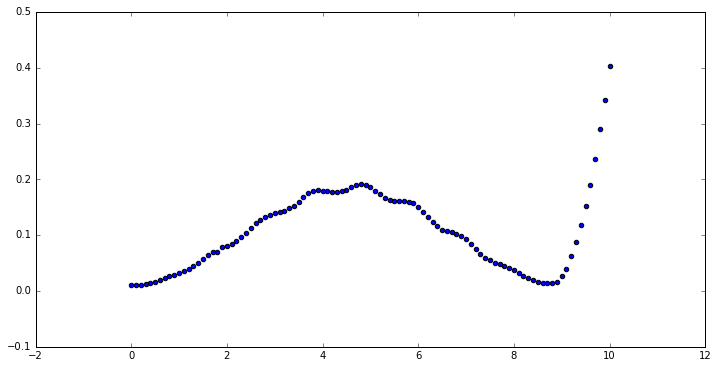

In [41]:
# Visualizamos los datos
fig=plt.figure(figsize=(12,6))
plt.scatter(data['Posicion (mm)'],data['Voltaje (V)'])
plt.show()

In [42]:
#Recortamos los primeros doce datos anómalos
data=data.loc[12:]

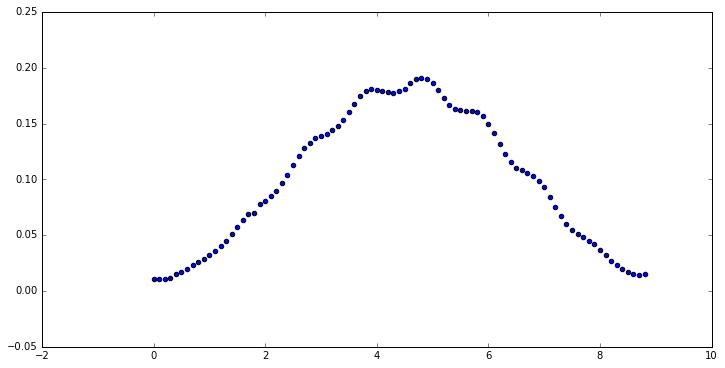

In [43]:
# Visualizamos los datos recortados
fig=plt.figure(figsize=(12,6))
plt.scatter(data['Posicion (mm)'],data['Voltaje (V)'])
plt.show()

In [44]:
##Se definen las incertidumbres experimentales de los datos
dv=0.001
dy=0.01

# Se calculan los ángulos
L=50.5*10.0 #Longitud entre distancia y pantalla
dtheta=dy/L

#Centramos con respecto a 0
data['Posicion (mm)']=data['Posicion (mm)']-data['Posicion (mm)'][np.argmax(data['Voltaje (V)'])+4]

#Corregimos los datos con el offset de 0.011 V
data['Voltaje (V)']=data['Voltaje (V)']-0.010

#Agregamos el angulo al dataframe
data['Theta (rad)']=pd.Series(np.arctan(data['Posicion (mm)']/L),index=data.index)

In [45]:
data.head()

,Posicion (mm),Voltaje (V),Theta (rad)
12,4.4,0.005,0.008713
13,4.3,0.004,0.008515
14,4.2,0.005,0.008317
15,4.1,0.007,0.008119
16,4.0,0.010,0.007921


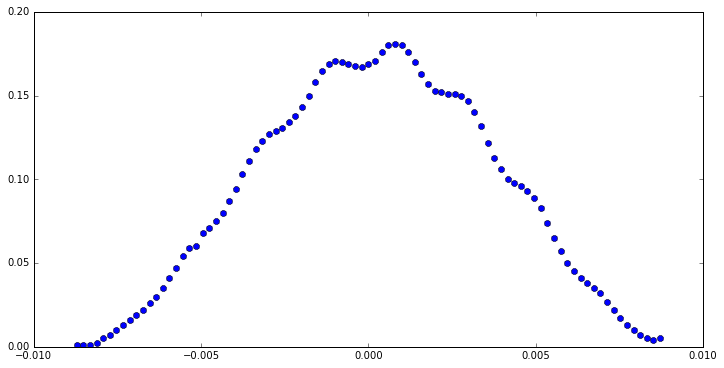

In [46]:
# Visualizamos los datos
fig=plt.figure(figsize=(12,6))
plt.errorbar(data['Theta (rad)'],data['Voltaje (V)'],xerr=dtheta,yerr=dv,fmt='o')
plt.show()

In [96]:
def I_simple(thet,I0):
    lam=0.00067
    a=0.08
    sinth=np.sin(thet)
    div=np.divide(np.sin((np.pi*a/lam)*sinth),(np.pi*a/lam)*sinth)
    i2=np.square(div)
    ret=I0*i2
    return ret

0.189898989899


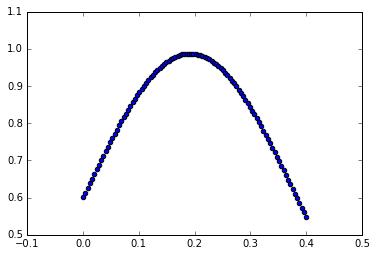

In [97]:
yobs=data['Voltaje (V)']

i0_space=np.linspace(0,0.4,100)

like=[]

for i in i0_space:
    ymodel=I_simple(data['Theta (rad)'],i)
    likei=np.exp(-0.5*np.sum((ymodel-yobs)**2))
    like.append(likei)

i0_opt=i0_space[np.argmax(like)]
print(i0_opt)
fig=plt.figure()
plt.scatter(i0_space,like)
plt.show()

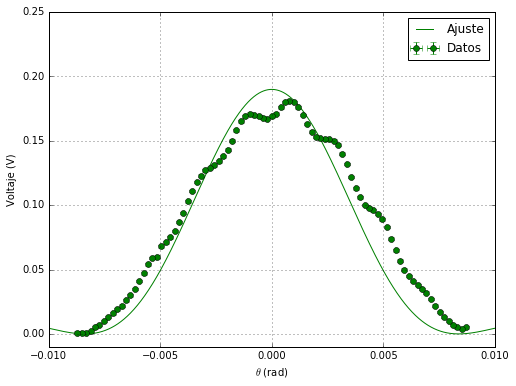

In [98]:
# Visualizamos los datos
fig=plt.figure(figsize=(8,6))
thetaajuste=np.linspace(-0.01,0.01,1000)
ajuste=I_simple(thetaajuste,i0_opt)
plt.plot(thetaajuste,ajuste,c='green',label='Ajuste')
plt.errorbar(data['Theta (rad)'],data['Voltaje (V)'],xerr=dtheta,yerr=dv,fmt='o',c='green',label='Datos')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.25)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid()
plt.show()